# Instalando e Importando Bibliotecas; Download e ajuste das planilhas


### Pandas, Numpy e Matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### NLTK
* Apoio ao pré-processamento de textos (tokenização, stopwords, radicalização)

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


### Networkx e Plotly
* Construção de Redes k-NN
* Visualização Interativa de Grafos

In [3]:
import plotly.graph_objects as go
import networkx as nx
from networkx.algorithms import community

### Folium (Mapas)

In [4]:
import folium
from folium.plugins import HeatMap

### Dataset

In [5]:
!pip install geocoder
!pip install haversine
import geocoder
from haversine import haversine, Unit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 3.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# (crie a sua se tiver problemas com limites: http://www.geonames.org/export/web-services.html)
key='3eabda_1' # key demo para API do geonames 
cache_geo = {}
cache_geo['BRODOWSKY SP Brazil'] = [-20.9842, -47.6592]
cache_geo['PREF MUN DE ESTANCIA TURISTICA DE PRESIDENTE EPITACEO SP Brazil'] = [-21.7825,-52.1463]
cache_geo['SECRETARIA DE ESTADO DE EDUCACAO DO DISTRITO FEDERAL DF Brazil'] = [-15.7801, -47.9292]
cache_geo['CACHOEIRA GRANDE MA Brazil'] = [-2.9261, -44.0573]
cache_geo['ROSARIO MA Brazil'] = [-2.93997, -44.2408]
cache_geo['LAGOA DO MATO MA Brazil'] = [-2.46667, -44.7]
cache_geo['GUIMARAES MA Brazil'] = [-2.13217, -44.6005]
cache_geo['BRAGANCA PA Brazil'] = [-1.06595, -46.7895]
cache_geo['CHAPADA RS Brazil'] = [-28.0455, -53.0672]
cache_geo['SECRETARIA DE EDUCACAO DO ESTADO DO RIO GRANDE DO SUL RS Brazil'] =  [-30.0277, -51.2287]
cache_geo['SECRETARIA DE EDUCACAO DO ESTADO DO RIO DE JANEIRO RJ Brazil']=[-22.9035, -43.2096]

import time
def get_lat_lng(local, ind):

  if local in cache_geo:
    return ind, cache_geo[local]
  g = geocoder.geonames(local, maxRows=1, key=key)
  num_tries = 0
  while(len(g)<1 and num_tries < 5):
    time.sleep(1)
    g = geocoder.geonames(local, maxRows=1, key=key)
    num_tries+=1
  if (len(g)> 0):
    for result in g:
      gps = [result.lat,result.lng]
      cache_geo[local]=gps
      return ind, gps
  else:
    return ind, []


## Baixar planilhas e descompactá-las

In [11]:
!gdown --id 1fDOQF4URvMXUBakRzg1O0AfRZKbQE5Fe

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1fDOQF4URvMXUBakRzg1O0AfRZKbQE5Fe 



Concatena as planilhas

In [ ]:
import glob
files = sorted(glob.glob('/content/*.csv'))

df1 = []
cont = 0
total = 0
for file in files:
    df1.append(pd.read_csv(file, sep=';'))
    total+=len(df1[cont])
    cont+=1
df = pd.concat(df1, ignore_index=True)
df['município'] = df['município'].str.replace('EMBUGUACU', 'EMBU GUACU')
df['município'] = df['município'].str.replace('MOGIGUACU', 'MOGI GUACU')
df['município'] = df['município'].str.replace('PARIQUERAACU', 'PARIQUERA ACU')
df['município'] = df['município'].str.replace('XIQUEXIQUE', 'XIQUE XIQUE')
df['município'] = df['município'].str.replace('APICUMACU', 'APICUM ACU')
df['município'] = df['município'].str.replace('CONCEICAO DO LAGOACU', 'CONCEICAO DO LAGO ACU')
df['município'] = df['município'].str.replace('TOMEACU', 'TOME ACU')
df['município'] = df['município'].str.replace('IGARAPEACU', 'IGARAPE ACU')
df['município'] = df['município'].str.replace('IGARAPEMIRI', 'IGARAPE MIRI')
df['município'] = df['município'].str.replace('PEIXEBOI', 'PEIXE BOI')
!rm -r /content/*.csv
!rm -r /content/*.zip

df = df.dropna(subset=['Energia'])
df['jaro_sim'] = df['jaro_sim'].astype(float)
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,9,10,11,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (8,14,18,20,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,10,11,15,17,18,19,22,23,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dis

,Unnamed: 0,nome do arquivo,município,UF,data,item_nota,item_taco,jaro_sim,Cat,Umidade,...,Cobre,Zinco,Retinol,RE,RAE,Tiamina,Riboflavina,Piridoxina,Niacina,C
0,0,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,06/03/2020,ovos brancos,"repolho, branco, cru",0.659259,149,94.72,...,0.016666666666666666,0.15,NaN,6,3,Tr,0.03,0.056666666666666664,Tr,18.716666666666665
1,1,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,06/03/2020,banana nanica climatizada,"banana, nanica, crua",0.888000,179,73.79666666666667,...,0.10333333333333333,0.17666666666666667,NaN,13.625,6.8125,Tr,0.02,0.14333333333333334,Tr,5.86
2,2,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,06/03/2020,batata beneficiada lisa especial,"batata, inglesa, cozida",0.824577,91,86.35966666666667,...,0.057666666666666665,0.18766666666666665,NaN,NaN,NaN,0.05,Tr,0.08333333333333333,Tr,3.76
3,3,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,13/03/2020,banana nanica climatizada,"banana, nanica, crua",0.888000,179,73.79666666666667,...,0.10333333333333333,0.17666666666666667,NaN,13.625,6.8125,Tr,0.02,0.14333333333333334,Tr,5.86
4,4,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,13/03/2020,ovos brancos,"repolho, branco, cru",0.659259,149,94.72,...,0.016666666666666666,0.15,NaN,6,3,Tr,0.03,0.056666666666666664,Tr,18.716666666666665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827267,48014,relatorioDocumentosDespesasItens - 2022-08-01T...,ELISIARIO,SP,20/08/2021,margarina doriana 500g c/sal,"abobrinha, italiana, crua",0.703557,71,93.86333333333334,...,0.04666666666666667,0.16666666666666666,NaN,40.5,20.25,Tr,0.056666666666666664,0.03,Tr,6.873333333333332
3827268,48015,relatorioDocumentosDespesasItens - 2022-08-01T...,ELISIARIO,SP,20/08/2021,salsicha,"salsa, crua",0.825758,153,88.65,...,0.2,1.3233333333333333,NaN,1743.25,871.625,0.11666666666666665,0.15,0.4666666666666666,0.72,51.69333333333333
3827269,48016,relatorioDocumentosDespesasItens - 2022-08-01T...,ELISIARIO,SP,20/08/2021,miolo da paleta cubos,"maionese, tradicional com ovos",0.674416,524,58.42366666666667,...,Tr,0.06,8,NaN,NaN,Tr,0.05333333333333334,Tr,Tr,Tr
3827270,48017,relatorioDocumentosDespesasItens - 2022-08-01T...,ELISIARIO,SP,20/08/2021,presunto,apresuntado,0.909091,323,73.72,...,0.029333333333333333,1.6496666666666666,Tr,NaN,NaN,0.6233333333333334,0.036666666666666674,Tr,0.6966666666666667,Tr


# Definição do limiar de similaridade (Cobertura)

In [ ]:
res_jaro = []
for i in np.linspace(0,1,50):
  res_jaro.append(df[df['jaro_sim'] >= i].shape[0]/1000000)

print(res_jaro)

[3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.82594, 3.825939, 3.825938, 3.825937, 3.825937, 3.82593, 3.82593, 3.825928, 3.825836, 3.825764, 3.82541, 3.823803, 3.817871, 3.799078, 3.739002, 3.619868, 3.436532, 3.269711, 3.238656, 3.109334, 3.014973, 2.987795, 2.92712, 2.713448, 2.304694, 1.857576, 1.494414, 0.83027, 0.324581, 0.179762, 0.175881, 0.013345]


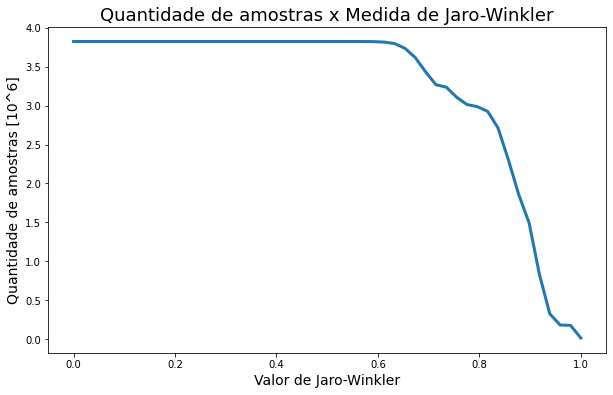

In [ ]:
#  Gráfico jaro_sim x quantidade de notas fiscais mapeadas

plt.figure(figsize = [10,6])

plt.plot(np.linspace(0,1,50),res_jaro, linewidth=3.0)

plt.title("Quantidade de amostras x Medida de Jaro-Winkler", fontsize = 18)
plt.xlabel("Valor de Jaro-Winkler", fontsize = 14)
plt.ylabel("Quantidade de amostras [10^6]", fontsize = 14)

plt.show(True)

In [ ]:
lim_jaro = 0.85
df_aux = df[df['jaro_sim'] >= lim_jaro] ## Manter apenas itens com similaridade maior ou igual a 0.85

print(f'Para um limiar de similaridade de {lim_jaro}, a quantidade de NFe é {df_aux.shape[0]}')

Para um limiar de similaridade de 0.85, a quantidade de NFe é 2449408


In [ ]:
df_aux

,Unnamed: 0,nome do arquivo,município,UF,data,item_nota,item_taco,jaro_sim,Cat,Umidade,...,Cobre,Zinco,Retinol,RE,RAE,Tiamina,Riboflavina,Piridoxina,Niacina,C
1,1,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,06/03/2020,banana nanica climatizada,"banana, nanica, crua",0.888000,179,73.79666666666667,...,0.10333333333333333,0.17666666666666667,NaN,13.625,6.8125,Tr,0.02,0.14333333333333334,Tr,5.86
3,3,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,13/03/2020,banana nanica climatizada,"banana, nanica, crua",0.888000,179,73.79666666666667,...,0.10333333333333333,0.17666666666666667,NaN,13.625,6.8125,Tr,0.02,0.14333333333333334,Tr,5.86
6,6,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,13/03/2020,batata doce,"batata, doce, crua",0.922222,89,69.51333333333334,...,0.11,0.2,NaN,NaN,NaN,0.056666666666666664,Tr,0.1,Tr,16.48
7,7,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,07/02/2020,carne bovina - acém moida,"carne, bovina, seca, cozida",0.891994,384,47.19,...,0.033,7.698,Tr,Tr,Tr,Tr,0.06333333333333334,Tr,2.32,NaN
9,9,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,07/02/2020,carne bovina - patinho em isca,"carne, bovina, contra-filé, à milanesa",0.873818,340,42.16466666666667,...,0.09600000000000002,2.858,15.083333333333334,NaN,NaN,0.07,0.04,Tr,3.016666666666667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827254,48001,relatorioDocumentosDespesasItens - 2022-08-01T...,ELISIARIO,SP,17/07/2021,leite italac 1l integral,"leite, de vaca, integral",0.864035,458,*,...,0.02,0.38,20.903333333333332,NaN,NaN,0.04,0.24,Tr,1.52,Tr
3827258,48005,relatorioDocumentosDespesasItens - 2022-08-01T...,ELISIARIO,SP,17/07/2021,presunto,apresuntado,0.909091,323,73.72,...,0.029333333333333333,1.6496666666666666,Tr,NaN,NaN,0.6233333333333334,0.036666666666666674,Tr,0.6966666666666667,Tr
3827261,48008,relatorioDocumentosDespesasItens - 2022-08-01T...,ELISIARIO,SP,17/07/2021,leite italac 1l integral,"leite, de vaca, integral",0.864035,458,*,...,0.02,0.38,20.903333333333332,NaN,NaN,0.04,0.24,Tr,1.52,Tr
3827262,48009,relatorioDocumentosDespesasItens - 2022-08-01T...,ELISIARIO,SP,21/07/2021,leite italac 1l integral,"leite, de vaca, integral",0.864035,458,*,...,0.02,0.38,20.903333333333332,NaN,NaN,0.04,0.24,Tr,1.52,Tr


# Escolha do ano de análise

In [ ]:
df_aux['data'] = pd.to_datetime(df_aux['data'], dayfirst=True, errors='coerce')
df_aux['ano'] = df_aux['data'].dt.year
df_aux

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,nome do arquivo,município,UF,data,item_nota,item_taco,jaro_sim,Cat,Umidade,...,Zinco,Retinol,RE,RAE,Tiamina,Riboflavina,Piridoxina,Niacina,C,ano
1,1,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,2020-03-06,banana nanica climatizada,"banana, nanica, crua",0.888000,179,73.79666666666667,...,0.17666666666666667,NaN,13.625,6.8125,Tr,0.02,0.14333333333333334,Tr,5.86,2020.0
3,3,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,2020-03-13,banana nanica climatizada,"banana, nanica, crua",0.888000,179,73.79666666666667,...,0.17666666666666667,NaN,13.625,6.8125,Tr,0.02,0.14333333333333334,Tr,5.86,2020.0
6,6,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,2020-03-13,batata doce,"batata, doce, crua",0.922222,89,69.51333333333334,...,0.2,NaN,NaN,NaN,0.056666666666666664,Tr,0.1,Tr,16.48,2020.0
7,7,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,2020-02-07,carne bovina - acém moida,"carne, bovina, seca, cozida",0.891994,384,47.19,...,7.698,Tr,Tr,Tr,Tr,0.06333333333333334,Tr,2.32,NaN,2020.0
9,9,relatorioDocumentosDespesasItens (1).xls,ELIAS FAUSTO,SP,2020-02-07,carne bovina - patinho em isca,"carne, bovina, contra-filé, à milanesa",0.873818,340,42.16466666666667,...,2.858,15.083333333333334,NaN,NaN,0.07,0.04,Tr,3.016666666666667,NaN,2020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3827254,48001,relatorioDocumentosDespesasItens - 2022-08-01T...,ELISIARIO,SP,2021-07-17,leite italac 1l integral,"leite, de vaca, integral",0.864035,458,*,...,0.38,20.903333333333332,NaN,NaN,0.04,0.24,Tr,1.52,Tr,2021.0
3827258,48005,relatorioDocumentosDespesasItens - 2022-08-01T...,ELISIARIO,SP,2021-07-17,presunto,apresuntado,0.909091,323,73.72,...,1.6496666666666666,Tr,NaN,NaN,0.6233333333333334,0.036666666666666674,Tr,0.6966666666666667,Tr,2021.0
3827261,48008,relatorioDocumentosDespesasItens - 2022-08-01T...,ELISIARIO,SP,2021-07-17,leite italac 1l integral,"leite, de vaca, integral",0.864035,458,*,...,0.38,20.903333333333332,NaN,NaN,0.04,0.24,Tr,1.52,Tr,2021.0
3827262,48009,relatorioDocumentosDespesasItens - 2022-08-01T...,ELISIARIO,SP,2021-07-21,leite italac 1l integral,"leite, de vaca, integral",0.864035,458,*,...,0.38,20.903333333333332,NaN,NaN,0.04,0.24,Tr,1.52,Tr,2021.0


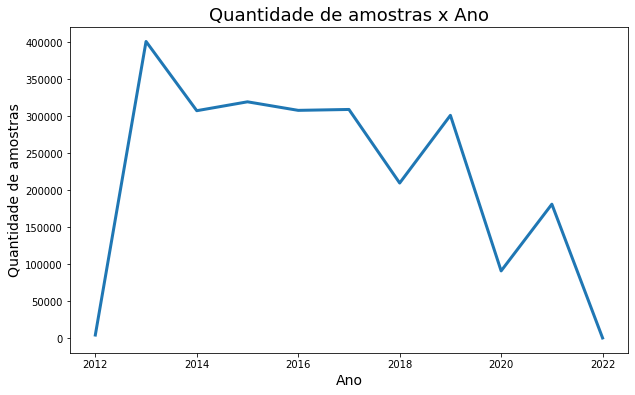

In [ ]:
res_anos = []
anos = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
for ano in anos:
  res_anos.append(df_aux[df_aux['ano'] == ano].shape[0])

#  Gráfico ano x quantidade de notas fiscais mapeadas

plt.figure(figsize = [10,6])

plt.plot(anos, res_anos, linewidth=3.0)

plt.title("Quantidade de amostras x Ano", fontsize = 18)
plt.xlabel("Ano", fontsize = 14)
plt.ylabel("Quantidade de amostras", fontsize = 14)

plt.show(True)

In [ ]:
ano = 2016
df_map = df_aux[df_aux['ano'] == ano]
df_map.shape[0]

307816

# Baixar e descompactar latitude e longitude dos municípios de São Paulo e Amazonas

In [ ]:
!gdown --id 17HAV__twjFpIHzJbgDL5flkEzBhIxLBq
location = pd.read_csv('/content/SP_AM_location.csv')
for index,row in location.iterrows():
  cache_geo[row['local']] = [float(row['latitude']), float(row['longitude'])]
!rm /content/SP_AM_location.csv
#cache_geo

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17HAV__twjFpIHzJbgDL5flkEzBhIxLBq
To: /content/SP_AM_location.csv
100% 28.3k/28.3k [00:00<00:00, 30.2MB/s]


# Exemplo de Alinhamento NFE-TACO (Estado de SP)

### Mapa - Geral

In [ ]:
# plotando documentos no mapa
campo_taco = 'Energia'
total = {}
indicador = {}
max_v = 0


for index,row in df_map.iterrows():
  local = row['município']+' '+	row['UF']+' Brazil'

  if local not in indicador: 
    indicador[local]=0
    total[local] = 0
  try:
      v = float(row[campo_taco])
      indicador[local]+=v
      total[local]+=1
      if indicador[local] > max_v: max_v = indicador[local]
  except:
    1


In [ ]:

m = folium.Map([-14.5931291,-56.6985808], zoom_start=4)
latitude = []
longitude = []
data_heatmap = []
cont = 0
ind = 0
score = []
for local in indicador:
  #print(cont, ' of ', len(indicador))
  ind, gps = get_lat_lng(local, ind)
  if (len(gps)>0):
    lat = gps[0]
    latitude.append(lat)
    lng = gps[1]
    longitude.append(lng)
    score.append(indicador[local])
    text = local+' '+campo_taco+' = '+str(indicador[local])
    data_heatmap.append([lat,lng, max_v - indicador[local]])
    folium.Marker([lat, lng], popup=text).add_to(m)
  else:
    print('Error city ', local, ' not found')
  cont+=1
m

Error city  PREFEITURA MUNIC DA ESTANCIA TURISTICA DE GUARATINGUETA SP Brazil  not found
Error city  PREFEITURA MUNICIPAL DA ESTÂNCIA TURISTICO RELIGIOSA Brazil  not found


In [ ]:
m = folium.Map([-14.5931291,-56.6985808], zoom_start=4)
HeatMap(data_heatmap).add_to(m)

m

## Salva em arquivo a latitude, longitude e o somatório das energias(kcal) - Desabilitado

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')
#location = pd.DataFrame(list(zip(indicador, latitude, longitude, score)), columns = ['local', 'latitude', 'longitude', 'score'])
#location.to_csv('/content/gdrive/MyDrive/AC_location.csv')